# Emission line galaxies - classification

Classifications of emission-line galaxies using SDSS database in combination with WISE database.
Notebook adopted from project work by Ridha Fathima Mohideen Malik, developed under supervision of Dragana Ilic, Isidora Jankov within MASS master program.

In [1]:
# imports

import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib
import matplotlib.pyplot as plt

from astroquery.sdss import SDSS

#References
#https://docs.scipy.org/doc/scipy/reference/stats.html
#https://pandas.pydata.org/docs/index.html
#https://astroquery.readthedocs.io/en/latest/
#https://astroquery.readthedocs.io/en/latest/sdss/sdss.html


## TASK 1 - BPT \& WHAN diagrams

In [2]:
# sdss query through astropy - https://www.astropy.org

# https://astroquery.readthedocs.io/en/latest/
# https://astroquery.readthedocs.io/en/latest/api/astroquery.sdss.SDSSClass.html#astroquery.sdss.SDSSClass.query_sql

with open('query_task1.txt', 'r') as file:
    query = file.read().replace('\n', ' ') ## input is a single string

results = SDSS.query_sql(query, timeout=500, data_release=18).to_pandas()

results.to_csv('nlr.csv', sep=',')

/usr/local/lib/python3.9/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [3]:
# our data

gal = pd.read_csv('nlr.csv', sep=',', index_col=0)
gal

,plate,mjd,fiberid,class,subclass,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,oi_6300_flux,sii_6717_flux,sii_6731_flux,h_alpha_eqw,nii_6584_eqw
0,266,51602,156,b'GALAXY',b'AGN',0.036459,135.4434,34.14171,105.46670,67.42683,10.733050,36.96299,31.64611,-22.38621,-11.565760
1,266,51630,158,b'GALAXY',b'AGN',0.036452,145.3708,36.18832,114.14670,73.52751,9.397298,43.39631,26.49167,-23.64526,-11.910770
2,266,51602,239,b'QSO',b'AGN BROADLINE',0.063200,326.3078,73.43578,171.31320,147.37580,29.397170,45.53933,34.00339,-15.11861,-7.846132
3,266,51602,504,b'GALAXY',b'STARBURST',0.030368,1538.4890,317.24620,82.93990,505.07090,34.581640,252.94760,179.66770,-57.50385,-18.783580
4,267,51608,47,b'GALAXY',b'AGN BROADLINE',0.110281,960.9924,160.04300,711.99670,708.85730,94.522480,254.31790,211.64680,-47.40646,-34.874570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,521,52326,550,b'GALAXY',b'STARFORMING',0.092903,340.1230,74.32658,20.38323,162.77940,10.443530,61.37014,42.92375,-31.53473,-15.308790
29996,522,52024,300,b'GALAXY',b'AGN',0.092367,491.7880,106.72370,334.56980,508.49690,90.422920,227.10080,189.80670,-15.13407,-14.489260
29997,522,52024,527,b'GALAXY',b'STARBURST',0.033769,1394.3910,409.23320,1154.45800,137.25080,29.773940,166.33360,121.85180,-181.70310,-17.835010
29998,522,52024,536,b'GALAXY',b'STARFORMING',0.033069,715.6680,153.24200,63.39930,273.19310,24.525340,152.84310,113.18230,-23.90817,-9.256891


In [4]:
gal.describe()

,plate,mjd,fiberid,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,oi_6300_flux,sii_6717_flux,sii_6731_flux,h_alpha_eqw,nii_6584_eqw
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000,30000.000000
mean,662.316867,52211.676667,321.701533,0.080847,2.333466e+07,6.804519e+06,1.365161e+07,4.133452e+06,7.276618e+05,3.572180e+06,2.488072e+06,-50.893411,-13.105830
std,379.002056,469.520977,184.820240,0.046716,7.623611e+08,2.323030e+08,6.790649e+08,1.332671e+08,2.185183e+07,1.059489e+08,7.390026e+07,66.945301,8.814764
min,266.000000,51602.000000,1.000000,0.000042,2.296743e+01,6.473162e+00,2.134984e+00,4.070409e+00,1.115707e+00,8.702217e+00,6.411207e+00,-2195.250000,-283.320000
25%,391.000000,51883.000000,161.000000,0.047027,2.477525e+02,6.120896e+01,3.347830e+01,7.099363e+01,1.028037e+01,5.044896e+01,3.630110e+01,-55.264245,-16.227830
50%,517.000000,52050.000000,324.000000,0.072976,3.913339e+02,9.644017e+01,6.804638e+01,1.258761e+02,1.436754e+01,7.271624e+01,5.303475e+01,-36.714920,-11.186330
75%,877.000000,52411.000000,483.000000,0.107422,6.391441e+02,1.583138e+02,1.731831e+02,2.174004e+02,2.198593e+01,1.100550e+02,8.129410e+01,-24.364587,-7.596229
max,2123.000000,54567.000000,640.000000,0.299924,4.997672e+10,1.634189e+10,7.443241e+10,8.225589e+09,1.157593e+09,5.504534e+09,4.037986e+09,-1.273633,2.317096


### Exploring data properties

[ 1.49725693  3.00785246  7.26286325  7.56631621  8.20656862  9.2203016
 10.03062105 10.63752698  8.23658045  5.44214546  5.33543673  4.8052277
  4.69518432  4.00157755  2.54767104  1.22715045  1.1337803   1.07042199
  1.01373298  0.890351    0.62691382  0.47352001  0.27677578  0.18340564
  0.11004338  0.15005916  0.11004338  0.09670479  0.0833662   0.10003944]


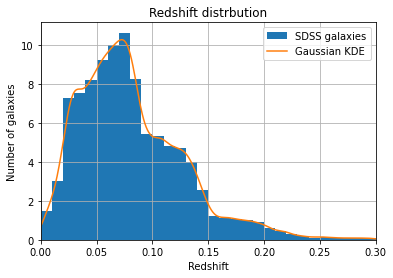

In [5]:
# redshift distribution

fig, ax = plt.subplots()
ax.set_xlim(0, 0.3)
gal.z.plot.hist(bins= 30, density=True, ax=ax, label="SDSS galaxies")
gal.z.plot.kde(ax=ax, label="Gaussian KDE")
y = np.histogram(gal.z, bins= 30, density=True)
print(y[0])
plt.xlabel('Redshift')
plt.ylabel('Number of galaxies')
plt.title('Redshift distrbution')
plt.grid(True)
plt.legend()
plt.savefig('z_kde.pdf', dpi=100);

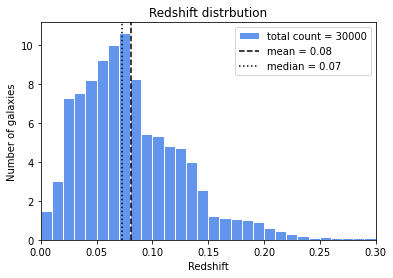

In [6]:
# redshift distribution

fig, ax = plt.subplots()
ax.set_xlim(0, 0.3)
gal.z.plot.hist(bins= 30, color='cornflowerblue', edgecolor='white', density=True, ax=ax, label=f"total count = {len(gal)}")
plt.axvline(np.mean(gal.z), linestyle='--', c='k', label=f"mean = {np.mean(gal.z):.2f}")
plt.axvline(np.median(gal.z), linestyle=':', c='k', label=f"median = {np.median(gal.z):.2f}")
plt.xlabel('Redshift')
plt.ylabel('Number of galaxies')
plt.title('Redshift distrbution')
plt.grid(False)
plt.legend()
plt.savefig('z_dist.pdf', dpi=100);

In [7]:
# class distribution

gal['class'].value_counts()

class
b'GALAXY'    29748
b'QSO'         252
Name: count, dtype: int64

In [8]:
# subclass distribution

gal['subclass'].value_counts()

subclass
b'STARFORMING'              13728
b'STARBURST'                12926
b'AGN'                       1979
b''                           913
b'AGN BROADLINE'              211
b'BROADLINE'                  105
b'STARBURST BROADLINE'         93
b'STARFORMING BROADLINE'       45
Name: count, dtype: int64

### BPT diagrams

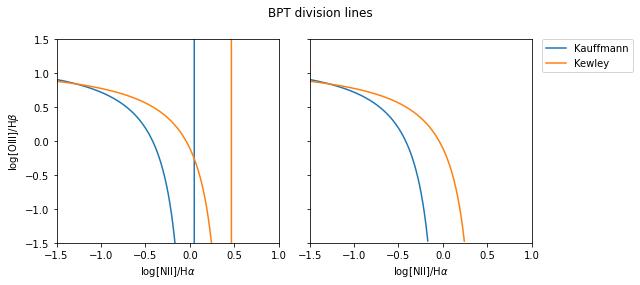

In [9]:
# Let's examine BPT division lines from papers:
# Kewley et al. (2001), ApJ 556, 121 - https://ui.adsabs.harvard.edu/abs/2001ApJ...556..121K/abstract
# Kauffman et al. (2003), MNRAS 346, 1055 - https://ui.adsabs.harvard.edu/abs/2003MNRAS.346.1055K/abstract

x = np.linspace(-1.5, 1.1, 1000)
y_kauffmann = 0.61/(x-0.05) + 1.3 #Kauffman et al. (2003), MNRAS 346, 1055
y_kewley = 0.61/(x-0.47) + 1.19 #Kewley et al. (2001), ApJ 556, 121

fig, axs = plt.subplots(1,2, figsize=(9,4), sharey=True)

fig.suptitle("BPT division lines")

axs[0].plot(x, y_kauffmann, label="Kauffmann")
axs[0].plot(x, y_kewley, label="Kewley")
axs[0].set_xlim(-1.5, 1.0)
axs[0].set_ylim(-1.5, 1.5)
axs[0].set_xlabel(r"log[NII]/H$\alpha$")
axs[0].set_ylabel(r"log[OIII]/H$\beta$")

# division lines as a function to make it single valued in our limits

def kauffman(x):
    ## x lim was calculated for a y of -1.5
    return [0.61/(i-0.05) + 1.3 if (i < (0.61/(-1.5-1.3))+0.05) else -np.inf for i in x] 

def kewley(x):
   ## x lim was calculated for a y of -1.5 
   return [0.61/(i-0.47) + 1.19 if (i < (0.61/(-1.5-1.19))+0.47) else -np.inf for i in x] 

axs[1].plot(x, kauffman(x), label="Kauffmann")
axs[1].plot(x, kewley(x), label="Kewley")
axs[1].set_xlim(-1.5, 1.0)
axs[1].set_ylim(-1.5, 1.5)
axs[1].set_xlabel(r"log[NII]/H$\alpha$")
axs[1].tick_params(direction='out')

for i in range(1,len(axs)):
    axs[i].set_ylim( axs[0].get_ylim() ) # align axes
    #axs[i].set_yticks([])

plt.subplots_adjust(wspace=.01)
plt.legend(bbox_to_anchor=(1.025,1.025), loc='upper left')
fig.tight_layout()
fig.savefig('bpt_division.pdf', dpi=100);

In [10]:
# Let's perfom BPT classification on our sample

def bpt_classifier(df):
    df['x_BPT'] = np.log10(df['nii_6584_flux']/df['h_alpha_flux'])
    df['y_BPT'] = np.log10(df['oiii_5007_flux']/df['h_beta_flux'])
    df['class_Kauffmann'] = np.where((df['y_BPT'] <= kauffman(df['x_BPT'])), "SFG", "QSO")
    df['class_Kewley'] = np.where((df['y_BPT'] <= kewley(df['x_BPT'])), "SFG", "QSO")
    df['class_BPT'] = np.where(((df['class_Kauffmann']=='SFG')&(df['class_Kewley']=='SFG')), "SFG", 
                                    np.where(((df['class_Kauffmann']=='QSO')&(df['class_Kewley']=='QSO')), "AGN", 
                                            "composite"))
    return df

def bpt_plt(df):

    fig = plt.figure()

    x = df['x_BPT']
    y = df['y_BPT']
    xy = np.vstack([x,y])
    df["kde"] = gaussian_kde(xy)(xy) #scatter plot colored by density using gaussian_kde

    class_dict = {'SFG': plt.cm.Blues, 
                  'composite': plt.cm.Greens, 
                  'AGN': plt.cm.Oranges
                  }
    
    for class_gal in class_dict.keys():
        df_sub = df[df['class_BPT'] == class_gal]
        x_sub = df_sub['x_BPT']
        y_sub = df_sub['y_BPT']
        z_sub = df_sub['kde']
        normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
        plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                    cmap=class_dict[class_gal], norm=normalize)
    
    x = np.linspace(np.min(df['x_BPT']),np.max( df['x_BPT']), 1000)
    plt.plot(x, kauffman(x), 'k--', label="Kauffmann")
    plt.plot(x, kewley(x), 'k:', label="Kewley")

    scatter1 = plt.scatter([], [], c='cornflowerblue', label="SFG")
    scatter2 = plt.scatter([], [], c='green', label="composite")
    scatter3 = plt.scatter([], [], c='darkorange', label="AGN")
    plt.title('BPT diagram')
    plt.legend((scatter3, scatter2, scatter1), ["QSO", "composite", "SFG"], 
              loc='lower left', title="BPT classification", fontsize='medium')
    plt.xlabel(r"log [NII]$\lambda$6584/H$\alpha$", fontsize=12)
    plt.ylabel(r"log [OIII]$\lambda$5007/H$\beta$", fontsize=12)
    plt.xlim(-1.5, 0.6)
    plt.ylim(-1.5, 1.5)
    plt.subplots_adjust(hspace=.0)
    
    return fig

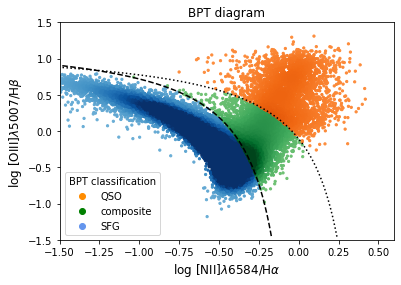

In [11]:
fig = bpt_plt(bpt_classifier(gal))
fig.savefig('bpt_classic.pdf', dpi=100);

In [12]:
# What about 100k points? This will take 10+ minutes to plot on a regular computer.

# Let's try together an alternative approach based on: 
# https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density

# HOMEWORK

class_Kewley_si
SFG    27991
QSO     2009
Name: count, dtype: int64


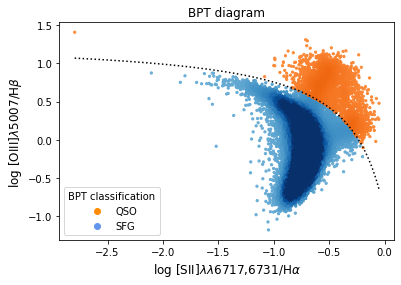

In [13]:
# BPT  diagram - [OIII]λ5007/Hβ vs. [SII]λλ6716,6731/Hα

df=gal

# division line as a function to make it single valued in our limits

def kewley_si(x):
   ## x was calculated for a y of -1.5
   return [0.72/(i-0.32) + 1.30 if (i < (0.72/(-1.5-1.3))+0.32) else -np.inf for i in x] 

df['x_BPT'] = np.log10(df['sii_6717_flux']/df['h_alpha_flux'])
df['y_BPT'] = np.log10(df['oiii_5007_flux']/df['h_beta_flux'])
df['class_Kewley_si'] = np.where((df['y_BPT'] <= kewley_si(df['x_BPT'])), "SFG", "QSO")

print(df['class_Kewley_si'].value_counts())

fig = plt.figure()

x = df['x_BPT']
y = df['y_BPT']
xy = np.vstack([x,y])
df["kde"] = gaussian_kde(xy)(xy)

class_dict = {'SFG': plt.cm.Blues, 
                'QSO': plt.cm.Oranges
                }

for class_gal in class_dict.keys():
    df_sub = df[df['class_Kewley_si'] == class_gal]
    x_sub = df_sub['x_BPT']
    y_sub = df_sub['y_BPT']
    z_sub = df_sub['kde']
    normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                cmap=class_dict[class_gal], norm=normalize)

x = np.linspace(np.min(df['x_BPT']),np.max( df['x_BPT']), 1000)
plt.plot(x, kewley_si(x), 'k:', label="Kewley_si")

scatter1 = plt.scatter([], [], c='cornflowerblue', label="SFG")
scatter3 = plt.scatter([], [], c='darkorange', label="QSO")
plt.title('BPT diagram')
plt.legend((scatter3, scatter1), ["QSO", "SFG"], 
            loc='lower left', title="BPT classification", fontsize='medium')
plt.xlabel(r"log [SII]$\lambda$$\lambda$6717,6731/H$\alpha$", fontsize=12)
plt.ylabel(r"log [OIII]$\lambda$5007/H$\beta$", fontsize=12)
plt.subplots_adjust(hspace=.0)

fig.savefig("bpt_oiii_sii.pdf", dpi=100);

class_Kewley_oi
SFG    25641
QSO     4359
Name: count, dtype: int64


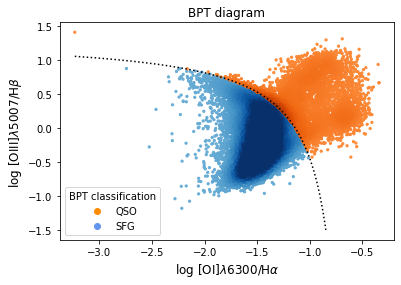

In [14]:
# BPT  diagram - [OIII]λ5007/Hβ vs. [OI]λ6300/Hα

df=gal

# division line as a function to make it single valued in our limits

def kewley_oi(x):
   ## x was calculated for a y of -1.5
   return [0.73/(i+0.59) + 1.33 if (i < (0.73/(-1.5-1.33))-0.59) else -np.inf for i in x] 

df['x_BPT'] = np.log10(df['oi_6300_flux']/df['h_alpha_flux'])
df['y_BPT'] = np.log10(df['oiii_5007_flux']/df['h_beta_flux'])
df['class_Kewley_oi'] = np.where((df['y_BPT'] <= kewley_oi(df['x_BPT'])), "SFG", "QSO")

print(df['class_Kewley_oi'].value_counts())

fig = plt.figure()

x = df['x_BPT']
y = df['y_BPT']
xy = np.vstack([x,y])
df["kde"] = gaussian_kde(xy)(xy)

class_dict = {'SFG': plt.cm.Blues, 
                'QSO': plt.cm.Oranges
                }

for class_gal in class_dict.keys():
    df_sub = df[df['class_Kewley_oi'] == class_gal]
    x_sub = df_sub['x_BPT']
    y_sub = df_sub['y_BPT']
    z_sub = df_sub['kde']
    normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                cmap=class_dict[class_gal], norm=normalize)

x = np.linspace(np.min(df['x_BPT']),np.max( df['x_BPT']), 1000)
plt.plot(x, kewley_oi(x), 'k:', label="Kewley_oi")

scatter1 = plt.scatter([], [], c='cornflowerblue', label="SFG")
scatter3 = plt.scatter([], [], c='darkorange', label="QSO")
plt.title('BPT diagram')
plt.legend((scatter3, scatter1), ["QSO", "SFG"], 
            loc='lower left', title="BPT classification", fontsize='medium')
plt.xlabel(r"log [OI]$\lambda$6300/H$\alpha$", fontsize=12)
plt.ylabel(r"log [OIII]$\lambda$5007/H$\beta$", fontsize=12)
plt.subplots_adjust(hspace=.0)

fig.savefig("bpt_oiii_oi.pdf", dpi=100);

### WHAN diagram

In [15]:
# WHAN classification based on 
# Cid Fernandes, R. et al. 2011, MNRAS, 413, 1687 - https://ui.adsabs.harvard.edu/abs/2011MNRAS.413.1687C/abstract

gal = bpt_classifier(gal)

gal['y_WHAN'] = np.abs(gal['h_alpha_eqw'])
gal['z_WHAN'] = np.abs(gal['nii_6584_eqw'])

gal['group_WHAN'] = np.where(((gal['z_WHAN']>0.5) & (gal['y_WHAN']>0.5)), "ELG", "lineless")

for i in gal.index:
    if gal.loc[i, 'y_WHAN'] > 0.5:
        if gal.loc[i, 'group_WHAN'] != "lineless":
            if gal.loc[i, 'y_WHAN'] > 3:
                if gal.loc[i, 'x_BPT'] > -0.4:
                    if gal.loc[i, 'y_WHAN'] > 6:
                        gal.loc[i, 'subclass_WHAN'] = "Seyfert"
                        gal.loc[i, 'class_WHAN'] = "AGN"
                    else:
                        gal.loc[i, 'subclass_WHAN'] = "wAGN"
                        gal.loc[i, 'class_WHAN'] = "LINER"
                else:
                    gal.loc[i, 'subclass_WHAN'] = "SFG" 
                    gal.loc[i, 'class_WHAN'] = "SFG"           
            else:
                gal.loc[i, 'subclass_WHAN'] = "RG"
                gal.loc[i, 'class_WHAN'] = "LINER"
        else:
            gal.loc[i, 'subclass_WHAN'] = "uncertain"
            gal.loc[i, 'class_WHAN'] = "uncertain"
    else:
        gal.loc[i, 'subclass_WHAN'] = "passive"

/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/3736428929.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Seyfert' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  gal.loc[i, 'subclass_WHAN'] = "Seyfert"
/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/3736428929.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'AGN' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  gal.loc[i, 'class_WHAN'] = "AGN"


In [16]:
gal['group_WHAN'].value_counts()

group_WHAN
ELG         29988
lineless       12
Name: count, dtype: int64

In [17]:
gal['class_WHAN'].value_counts()

class_WHAN
SFG          20977
AGN           8183
LINER          828
uncertain       12
Name: count, dtype: int64

In [18]:
gal['subclass_WHAN'].value_counts()

subclass_WHAN
SFG          20977
Seyfert       8183
wAGN           650
RG             178
uncertain       12
Name: count, dtype: int64

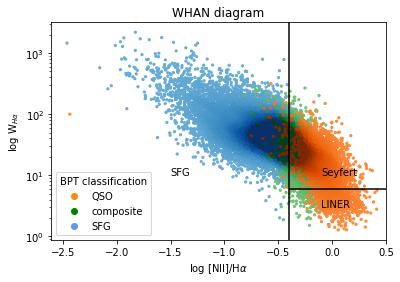

In [19]:
# WHAN diagram

df = gal
x = df['x_BPT']
y = np.log10(df['y_WHAN'])
xy = np.vstack([x,y])
df['kde'] = gaussian_kde(xy)(xy)

class_dict = {'SFG': plt.cm.Blues, 
              'composite': plt.cm.Greens, 
              'AGN': plt.cm.Oranges
              }
    
for class_gal in class_dict.keys():
    df_sub = df[df['class_BPT'] == class_gal]
    x_sub = df_sub['x_BPT']
    y_sub = df_sub['y_WHAN']
    z_sub = df_sub['kde']
    normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                cmap=class_dict[class_gal], norm=normalize)

plt.axvline(x=-0.4, color='black')
plt.hlines(y=6, xmin=-0.4, xmax=0.5, color='black')
plt.annotate('Seyfert', xy=(-0.1,10), color='black')
plt.annotate('LINER', xy=(-0.1,3), color='black')
plt.annotate('SFG', xy=(-1.5,10), color='black')
plt.yscale('log')
plt.xlim(right=0.5)

scatter1 = plt.scatter([], [], c='cornflowerblue', label="SFG")
scatter2 = plt.scatter([], [], c='green', label="composite")
scatter3 = plt.scatter([], [], c='darkorange', label="AGN")
plt.legend((scatter3, scatter2, scatter1), ["QSO", "composite", "SFG"], 
            loc='lower left', title="BPT classification", fontsize='medium')

plt.xlabel(r"log [NII]/H$\alpha$")
plt.ylabel(r"log W$_{H\alpha}$")
plt.title("WHAN diagram")
plt.savefig('whan.pdf', dpi=100);

/usr/local/lib/python3.9/site-packages/matplotlib/text.py:1419: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/usr/local/lib/python3.9/site-packages/matplotlib/text.py:1421: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/usr/local/lib/python3.9/site-packages/matplotlib/text.py:1419: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/usr/local/lib/python3.9/site-packages/matplotlib/text.py:1421: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


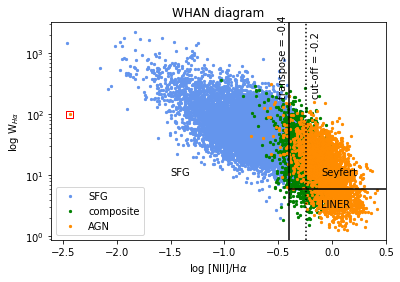

In [20]:
# WHAN diagram

df = gal

class_dict = {'SFG': 'cornflowerblue', 
              'composite': 'green', 
              'AGN': 'darkorange'
              }
    
for class_gal in class_dict.keys():
    df_sub = df[df['class_BPT'] == class_gal]
    x_sub = df_sub['x_BPT']
    y_sub = df_sub['y_WHAN']
    plt.scatter(x_sub, y_sub, c=class_dict[class_gal], s=5, label=class_gal)
    if class_gal=='SFG':
        plt.axvline(np.max(df_sub['x_BPT']), ls=':', color='black')
        plt.annotate(f"cut-off = {np.max(df_sub['x_BPT']):.1f}", xy=(np.max(df_sub['x_BPT'])+0.05,200), rotation=90, color='black')

plt.axvline(x=-0.4, color='black')
plt.annotate("transpose = -0.4", xy=(-0.4-0.1,200), rotation=90, color='black')
plt.hlines(y=6, xmin=-0.4, xmax=0.5, color='black')
plt.annotate("Seyfert", xy=(-0.1,10), color='black')
plt.annotate("LINER", xy=(-0.1,3), color='black')
plt.annotate("SFG", xy=(-1.5,10), color='black')
plt.yscale('log')
plt.xlim(right=0.5)

#df_sub = df[df['group_WHAN'] == 'lineless']
#plt.scatter(df_sub['x_BPT'], df_sub['y_WHAN'], ec='red', fc='None', marker='o', s=50, label='uncertain')

df_sub = df[(df.class_BPT =='AGN') & (df.subclass_WHAN=='SFG') & (df.x_BPT<-2)]
plt.scatter(df_sub['x_BPT'], df_sub['y_WHAN'], ec='red', fc='None', marker='s', s=50)
plt.annotate('SDSS J125305.97\n-031258.8', xy=(df_sub['x_BPT']-0.2, df_sub['y_WHAN']-50), color='black', fontsize=8)

plt.xlabel(r"log [NII]/H$\alpha$")
plt.ylabel(r"log W$_{H\alpha}$")
plt.title("WHAN diagram")
plt.legend()
plt.savefig('whan_annotated.pdf', dpi=100);

In [21]:
gal[(gal.class_WHAN =='uncertain')]

,plate,mjd,fiberid,class,subclass,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,...,class_Kewley,class_BPT,kde,class_Kewley_si,class_Kewley_oi,y_WHAN,z_WHAN,group_WHAN,subclass_WHAN,class_WHAN
3907,712,52179,120,b'GALAXY',b'STARFORMING',0.100279,161.46530,39.13628,23.73899,45.398560,...,SFG,SFG,2.841265,SFG,SFG,32.228550,0.445839,lineless,uncertain,uncertain
9618,519,52283,165,b'GALAXY',b'STARBURST',0.100150,160.69910,41.24368,21.36432,37.753170,...,SFG,SFG,1.923623,SFG,SFG,36.970360,0.373773,lineless,uncertain,uncertain
10706,396,51816,237,b'GALAXY',b'STARBURST',0.100061,196.14560,49.47662,35.49763,63.273140,...,SFG,SFG,4.176140,SFG,SFG,41.128430,0.266877,lineless,uncertain,uncertain
12220,691,52199,594,b'GALAXY',b'',0.193502,149.86440,33.99573,40.64509,32.656760,...,SFG,SFG,1.510303,SFG,QSO,56.620000,0.143819,lineless,uncertain,uncertain
12237,709,52205,79,b'GALAXY',b'STARBURST',0.029939,264.30350,96.82309,195.83810,6.336245,...,SFG,SFG,0.002232,SFG,SFG,41.393830,0.450224,lineless,uncertain,uncertain
15160,424,51893,124,b'GALAXY',b'',0.051915,342.23110,105.00790,241.47890,39.650960,...,SFG,SFG,0.515043,SFG,SFG,51.211990,0.433846,lineless,uncertain,uncertain
17233,749,52226,217,b'GALAXY',b'',0.101004,307.26930,83.53780,30.93728,104.040700,...,SFG,SFG,4.247204,SFG,SFG,41.054690,0.227207,lineless,uncertain,uncertain
17902,784,52327,332,b'GALAXY',b'STARBURST',0.258647,365.55470,104.81580,157.18580,62.712300,...,SFG,SFG,0.593565,SFG,SFG,85.894600,0.297303,lineless,uncertain,uncertain
18148,678,52884,549,b'GALAXY',b'',0.032510,1618.49400,339.11660,248.90660,491.326400,...,SFG,SFG,2.919887,SFG,SFG,52.966190,0.099646,lineless,uncertain,uncertain
19771,399,51817,355,b'GALAXY',b'',0.012659,63.95274,16.64981,17.17562,15.545620,...,SFG,SFG,0.002743,SFG,QSO,3.830764,0.449749,lineless,uncertain,uncertain


In [22]:
gal[(gal.class_BPT =='AGN') & (gal.class_WHAN=='SFG') & (gal.x_BPT<-2)]

,plate,mjd,fiberid,class,subclass,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,...,class_Kewley,class_BPT,kde,class_Kewley_si,class_Kewley_oi,y_WHAN,z_WHAN,group_WHAN,subclass_WHAN,class_WHAN
7612,337,51997,97,b'GALAXY',b'STARBURST',0.022723,1352901.0,25035.06,640257.3,4968.048,...,QSO,AGN,0.002227,QSO,QSO,100.2064,78.2348,ELG,SFG,SFG


In [23]:
print(f"SFG in BPT: {gal[(gal.class_BPT =='SFG')].count()[0]/len(gal) * 100} %"+
      f"\nSFG in WHAN: {gal[(gal.class_WHAN=='SFG')].count()[0]/len(gal) * 100} %")

SFG in BPT: 78.62666666666667 %
SFG in WHAN: 69.92333333333333 %


/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/3561567233.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"SFG in BPT: {gal[(gal.class_BPT =='SFG')].count()[0]/len(gal) * 100} %"+
/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/3561567233.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"\nSFG in WHAN: {gal[(gal.class_WHAN=='SFG')].count()[0]/len(gal) * 100} %")


In [24]:
print(f"Composite in BPT, SFG in WHAN: {gal[(gal.class_BPT =='composite') & (gal.class_WHAN=='SFG')].count()[0]/len(gal) * 100} %"+
      f"\nAGN in BPT, SFG in WHAN: {gal[(gal.class_BPT =='AGN') & (gal.class_WHAN=='SFG')].count()[0]/len(gal) * 100} %")

Composite in BPT, SFG in WHAN: 0.65 %
AGN in BPT, SFG in WHAN: 0.14666666666666667 %


/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/2903933832.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Composite in BPT, SFG in WHAN: {gal[(gal.class_BPT =='composite') & (gal.class_WHAN=='SFG')].count()[0]/len(gal) * 100} %"+
/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/2903933832.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"\nAGN in BPT, SFG in WHAN: {gal[(gal.class_BPT =='AGN') & (gal.class_WHAN=='SFG')].count()[0]/len(gal) * 100} %")


In [25]:
print(f"AGN in BPT: {gal[(gal.class_BPT =='AGN')].count()[0]/len(gal) * 100} %"+
      f"\nAGN in WHAN: {gal[(gal.class_WHAN=='AGN')|(gal.class_WHAN=='LINER')].count()[0]/len(gal) * 100} %")

AGN in BPT: 9.47 %
AGN in WHAN: 30.03666666666667 %


/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/1289124998.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"AGN in BPT: {gal[(gal.class_BPT =='AGN')].count()[0]/len(gal) * 100} %"+
/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/1289124998.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"\nAGN in WHAN: {gal[(gal.class_WHAN=='AGN')|(gal.class_WHAN=='LINER')].count()[0]/len(gal) * 100} %")


In [26]:
print(f"AGN in BPT: {gal[(gal.class_BPT =='AGN')].count()[0]/len(gal) * 100} %"+
      f"\nStrong AGN in WHAN: {gal[(gal.class_WHAN=='AGN')].count()[0]/len(gal) * 100} %")

AGN in BPT: 9.47 %
Strong AGN in WHAN: 27.276666666666667 %


/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/1692807536.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"AGN in BPT: {gal[(gal.class_BPT =='AGN')].count()[0]/len(gal) * 100} %"+
/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/1692807536.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"\nStrong AGN in WHAN: {gal[(gal.class_WHAN=='AGN')].count()[0]/len(gal) * 100} %")


In [27]:
print(f"AGN in BPT: {gal[(gal.class_BPT =='AGN')].count()[0]/len(gal) * 100} %"+
      f"\nLINER (wAGN & RG) in WHAN: {gal[(gal.class_WHAN=='LINER')].count()[0]/len(gal) * 100} %")

AGN in BPT: 9.47 %
LINER (wAGN & RG) in WHAN: 2.76 %


/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/3831180353.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"AGN in BPT: {gal[(gal.class_BPT =='AGN')].count()[0]/len(gal) * 100} %"+
/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/3831180353.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"\nLINER (wAGN & RG) in WHAN: {gal[(gal.class_WHAN=='LINER')].count()[0]/len(gal) * 100} %")


In [28]:
print(f"AGN in BPT and WHAN: {gal[(gal.class_BPT =='AGN') & (gal.class_WHAN =='AGN')].count()[0]/len(gal) * 100} %"+
      f"\nAGN in BPT but not WHAN: {gal[(gal.class_BPT =='AGN') & (gal.class_WHAN !='AGN')].count()[0]/len(gal) * 100} %"+
      f"\nAGN in WHAN but not BPT: {gal[(gal.class_BPT !='AGN') & (gal.class_WHAN =='AGN')].count()[0]/len(gal) * 100} %")

AGN in BPT and WHAN: 7.19 %
AGN in BPT but not WHAN: 2.2800000000000002 %
AGN in WHAN but not BPT: 20.086666666666666 %


/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/406922451.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"AGN in BPT and WHAN: {gal[(gal.class_BPT =='AGN') & (gal.class_WHAN =='AGN')].count()[0]/len(gal) * 100} %"+
/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/406922451.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"\nAGN in BPT but not WHAN: {gal[(gal.class_BPT =='AGN') & (gal.class_WHAN !='AGN')].count()[0]/len(gal) * 100} %"+
/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/406922451.py:3: FutureWarning: Series.__getitem__ treating keys as posi

## TASK 2 - Colour-colour diagram (MIR)

In [29]:
# sdss query through astropy

with open('query_task2.txt', 'r') as file:
    query = file.read().replace('\n', ' ') ## input is a single string

results_cross = SDSS.query_sql(query, timeout=500, data_release=18).to_pandas()

results_cross.to_csv('nlr_cross.csv', sep=',')

/usr/local/lib/python3.9/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [30]:
# our data

gal_mir = pd.read_csv('nlr_cross.csv', sep=',', index_col=0)
gal_mir = pd.merge(gal_mir, gal, on=['plate', 'mjd', 'fiberid'])
gal_mir = bpt_classifier(gal_mir)
gal_mir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25076 entries, 0 to 25075
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   plate            25076 non-null  int64  
 1   mjd              25076 non-null  int64  
 2   fiberid          25076 non-null  int64  
 3   z_x              25076 non-null  float64
 4   subclass_x       25076 non-null  object 
 5   e_bv_sfd         25076 non-null  float64
 6   w1mpro           25076 non-null  float64
 7   w2mpro           25076 non-null  float64
 8   w3mpro           25076 non-null  float64
 9   w1flux           25076 non-null  float64
 10  w2flux           25076 non-null  float64
 11  w3flux           25076 non-null  float64
 12  class            25076 non-null  object 
 13  subclass_y       25076 non-null  object 
 14  z_y              25076 non-null  float64
 15  h_alpha_flux     25076 non-null  float64
 16  h_beta_flux      25076 non-null  float64
 17  oiii_5007_fl

In [31]:
# extinction correction, 
# Ruoyi & Haibo 2023 - https://ui.adsabs.harvard.edu/abs/2023ApJS..264...14Z/abstract, https://arxiv.org/abs/2210.15918

R_w1w2 = 0.056 ## 
R_w2w3 = -0.045

gal_mir['w1-w2'] = gal_mir['w1mpro'] - gal_mir['w2mpro'] - (R_w1w2 * gal_mir['e_bv_sfd'])
gal_mir['w2-w3'] = gal_mir['w2mpro'] - gal_mir['w3mpro'] - (R_w2w3 * gal_mir['e_bv_sfd'])

gal_mir['x_mat'] = np.log10(gal_mir['w3flux']/gal_mir['w2flux'])
gal_mir['y_mat'] = np.log10(gal_mir['w2flux']/gal_mir['w1flux'])

In [32]:
# WISE classification

gal_mir['class_WISE'] = np.where((gal_mir['w1-w2'] >= 0.8), 'AGN', 
                                 (np.where((gal_mir['w2-w3'] <= 2), 'Spheroids', 
                                           (np.where(((gal_mir['w2-w3'] <= 3.5) & (gal_mir['w2-w3'] > 2)), 'Intermediate disks', 
                                                     (np.where((gal_mir['w2-w3'] > 3.5), 'SF disks', '')))))))

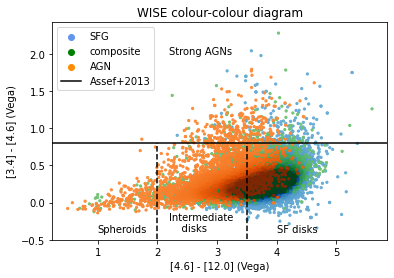

In [33]:
# WISE colour-colour plot

df = gal_mir
x = df['w2-w3']
y = df['w1-w2']
xy = np.vstack([x,y])
df['kde'] = gaussian_kde(xy)(xy)

class_dict = {'SFG': plt.cm.Blues, 
              'composite': plt.cm.Greens, 
              'AGN': plt.cm.Oranges
              }
    
for class_gal in class_dict.keys():
    df_sub = df[df['class_BPT'] == class_gal]
    x_sub = df_sub['w2-w3']
    y_sub = df_sub['w1-w2']
    z_sub = df_sub["kde"]
    normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                cmap=class_dict[class_gal], norm=normalize)

scatter1 = plt.scatter([], [], c='cornflowerblue', label="SFG")
scatter2 = plt.scatter([], [], c='green', label="composite")
scatter3 = plt.scatter([], [], c='darkorange', label="AGN")
plt.legend((scatter3, scatter2, scatter1), ["QSO", "composite", "SFG"], 
            loc='upper left', title="BPT classification", fontsize='medium')

plt.axhline(y=0.8, c='k', label="Assef+2013")
plt.vlines(x=2, ymin=-0.6, ymax=0.8, colors='k', linestyle='--')
plt.vlines(x=3.5, ymin=-0.6, ymax=0.8, colors='k', linestyle='--')
plt.annotate('Strong AGNs', xy=(2.2,2), color='black')
plt.annotate('Spheroids', xy=(1,-0.4), color='black')
plt.annotate('Intermediate\n    disks', xy=(2.2,-0.39), color='black')
plt.annotate('SF disks', xy=(4,-0.4), color='black')
plt.ylim(bottom=-0.5)

plt.xlabel("[4.6] - [12.0] (Vega)")
plt.ylabel("[3.4] - [4.6] (Vega)")
plt.title("WISE colour-colour diagram")

plt.legend()
plt.savefig('wise_cc.pdf', dpi=100);

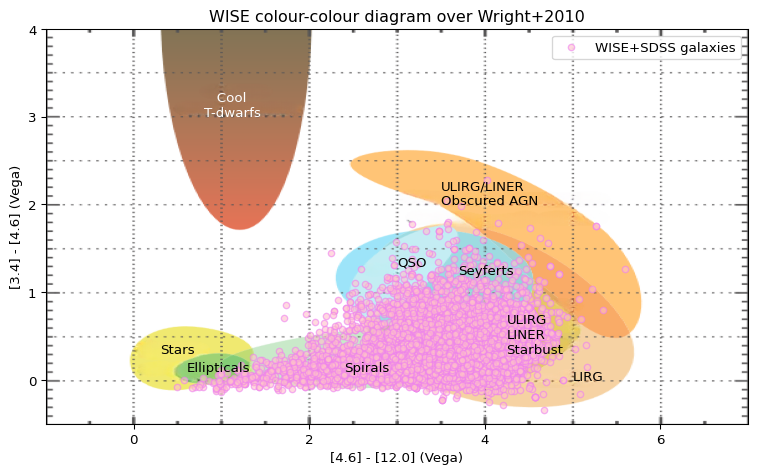

In [34]:
# c-c plot over Wright+2010

fig = plt.figure(figsize=(566*2/120, 622*2/120), dpi=96)

img = plt.imread('wright+2010_cleanup.png')
plt.imshow(img, zorder=0, extent=[-1.009, 7, -0.510, 4], alpha=0.75, aspect='equal')

plt.scatter(gal_mir['w2-w3'], gal_mir['w1-w2'],  color='pink', edgecolors='violet', marker='.', alpha=0.6, s=90, zorder=1, label='WISE+SDSS galaxies')
plt.annotate('   Cool\nT-dwarfs', xy=(0.8,3), color='white')
plt.annotate('Ellipticals', xy=(0.6,0.1), color='black')
plt.annotate('Stars', xy=(0.3,0.3), color='black')
plt.annotate('Spirals', xy=(2.4,0.1), color='black')
plt.annotate('QSO', xy=(3,1.3), color='black')
plt.annotate('Seyferts', xy=(3.7,1.2), color='black')
plt.annotate('ULIRG\nLINER\nStarbust', xy=(4.25,0.3), color='black')
plt.annotate('LIRG', xy=(5,0), color='black')
plt.annotate('ULIRG/LINER\nObscured AGN', xy=(3.5,2), color='black')

plt.xlim(-1,7)
plt.xticks(np.arange(0, 7, 2))
plt.yticks(np.arange(0, 5, 1))
plt.ylim(-0.5,4)

plt.xlabel("[4.6] - [12.0] (Vega)")
plt.ylabel("[3.4] - [4.6] (Vega)")
plt.title("WISE colour-colour diagram over Wright+2010")

plt.legend()
plt.savefig('wise_wright+2010.pdf', dpi=100);

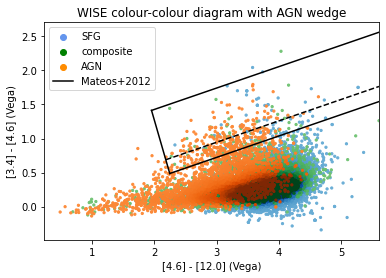

In [35]:
# c-c plot with AGN wedge Matteos+2012
# https://ui.adsabs.harvard.edu/abs/2012MNRAS.426.3271M/abstract

df = gal_mir
x = df['w2-w3']
y = df['w1-w2']
xy = np.vstack([x,y])
df['kde'] = gaussian_kde(xy)(xy)

class_dict = {'SFG': plt.cm.Blues, 
              'composite': plt.cm.Greens, 
              'AGN': plt.cm.Oranges
              }
    
for class_gal in class_dict.keys():
    df_sub = df[df['class_BPT'] == class_gal]
    x_sub = df_sub['w2-w3']
    y_sub = df_sub['w1-w2']
    z_sub = df_sub['kde']
    normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                cmap=class_dict[class_gal], norm=normalize)

scatter1 = plt.scatter([], [], c='cornflowerblue', label="SFG")
scatter2 = plt.scatter([], [], c='green', label="composite")
scatter3 = plt.scatter([], [], c='darkorange', label="AGN")
plt.legend((scatter3, scatter2, scatter1), ["QSO", "composite", "SFG"], 
            loc='upper left', title="BPT classification", fontsize='medium')

def y_cen(x): return [0.315*i for i in x]
def y_top(x): return [0.315*i+0.796 for i in x]
def y_bot(x): return [0.315*i-0.222 for i in x]
def y_lim(x): return [-3.172*i+7.624 for i in x]

x_cen = (7.624)/(0.315+3.172)
x_top = (7.624-0.796)/(0.315+3.172)
x_bot = (7.624+0.222)/(0.315+3.172)
def x_range(x_pos): return np.linspace(x_pos, np.max(df['w2-w3']), 100)
x_lim = np.linspace(x_top, x_bot, 100)

plt.plot(x_range(x_cen), y_cen(x_range(x_cen)), 'k--')
plt.plot(x_range(x_top), y_top(x_range(x_top)), 'k-', label='Mateos+2012')
plt.plot(x_range(x_bot), y_bot(x_range(x_bot)), 'k-')
plt.plot(x_lim, y_lim(x_lim), 'k-')
plt.xlim(right=np.max(df['w2-w3']))

plt.legend()
plt.xlabel("[4.6] - [12.0] (Vega)")
plt.ylabel("[3.4] - [4.6] (Vega)")
plt.title("WISE colour-colour diagram with AGN wedge")
plt.savefig("wise_wedge.pdf", dpi=100);

In [36]:
# WHAN classification
x_top = (7.624-0.796)/(0.315+3.172)
x_bot = (7.624+0.222)/(0.315+3.172)

def y_top(x): return 0.315*x+0.796 if x>=x_top else -np.inf
def y_bot(x): return 0.315*x-0.222 if x>=x_bot else -np.inf
def y_lim(x): return -3.172*x+7.624 if x>=x_top and x<=x_bot else -np.inf

for i, x, y in zip(gal_mir.index, gal_mir['w2-w3'], gal_mir['w1-w2']):
    if y <= y_top(x) and y > y_lim(x) and y > y_bot(x):
        gal_mir.loc[i, 'class_Mateos'] = "AGN"
    else:
        gal_mir.loc[i, 'class_Mateos'] = "other"
        
gal_mir['class_Mateos'].value_counts()

/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/3334964612.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'other' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  gal_mir.loc[i, 'class_Mateos'] = "other"


class_Mateos
other    24608
AGN        468
Name: count, dtype: int64

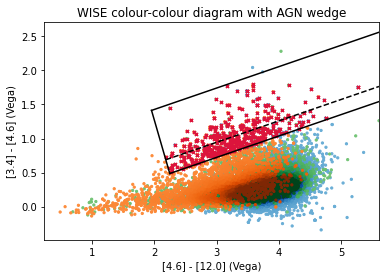

In [37]:
# c-c plot with AGN wedge Matteos+2012 checking classification is right
# https://ui.adsabs.harvard.edu/abs/2012MNRAS.426.3271M/abstract

df = gal_mir
x = df['w2-w3']
y = df['w1-w2']
xy = np.vstack([x,y])
df['kde'] = gaussian_kde(xy)(xy)

class_dict = {'SFG': plt.cm.Blues, 
              'composite': plt.cm.Greens, 
              'AGN': plt.cm.Oranges
              }
    
for class_gal in class_dict.keys():
    df_sub = df[df['class_BPT'] == class_gal]
    x_sub = df_sub['w2-w3']
    y_sub = df_sub['w1-w2']
    z_sub = df_sub['kde']
    normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                cmap=class_dict[class_gal], norm=normalize)

df_sub = df[df['class_Mateos'] == 'AGN']
plt.scatter(df_sub['w2-w3'], df_sub['w1-w2'],  color='crimson', marker='x', s=10, zorder=1)

def y_cen(x): return [0.315*i for i in x]
def y_top(x): return [0.315*i+0.796 for i in x]
def y_bot(x): return [0.315*i-0.222 for i in x]
def y_lim(x): return [-3.172*i+7.624 for i in x]

x_cen = (7.624)/(0.315+3.172)
x_top = (7.624-0.796)/(0.315+3.172)
x_bot = (7.624+0.222)/(0.315+3.172)
def x_range(x_pos): return np.linspace(x_pos, np.max(df['w2-w3']), 100)
x_lim = np.linspace(x_top, x_bot, 100)

plt.plot(x_range(x_cen), y_cen(x_range(x_cen)), 'k--')
plt.plot(x_range(x_top), y_top(x_range(x_top)), 'k-')
plt.plot(x_range(x_bot), y_bot(x_range(x_bot)), 'k-')
plt.plot(x_lim, y_lim(x_lim), 'k-')
plt.xlim(right=np.max(df['w2-w3']))

plt.xlabel("[4.6] - [12.0] (Vega)")
plt.ylabel("[3.4] - [4.6] (Vega)")
plt.title("WISE colour-colour diagram with AGN wedge");

In [38]:
gal_mir[(gal_mir.plate==337) & 	(gal_mir.mjd==51997) & (gal_mir.mjd==97)]

,plate,mjd,fiberid,z_x,subclass_x,e_bv_sfd,w1mpro,w2mpro,w3mpro,w1flux,...,z_WHAN,group_WHAN,subclass_WHAN,class_WHAN,w1-w2,w2-w3,x_mat,y_mat,class_WISE,class_Mateos


In [39]:
print(f"AGN in BPT: {gal_mir[(gal_mir.class_BPT =='AGN')].count()[0]/len(gal_mir) * 100} %"+
      f"\nAGN in WISE: {gal_mir[(gal_mir.class_WISE =='AGN')].count()[0]/len(gal_mir) * 100} %"+
      f"\nAGN in Mateos: {gal_mir[(gal_mir.class_Mateos =='AGN')].count()[0]/len(gal_mir) * 100} %")

AGN in BPT: 10.296698037964587 %
AGN in WISE: 2.580156324772691 %
AGN in Mateos: 1.866326367841761 %


/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/2463256136.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"AGN in BPT: {gal_mir[(gal_mir.class_BPT =='AGN')].count()[0]/len(gal_mir) * 100} %"+
/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/2463256136.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"\nAGN in WISE: {gal_mir[(gal_mir.class_WISE =='AGN')].count()[0]/len(gal_mir) * 100} %"+
/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/2463256136.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integ

In [40]:
print(f"AGN in BPT and WISE: {gal_mir[(gal_mir.class_BPT =='AGN') & (gal_mir.class_WISE =='AGN')].count()[0]/len(gal_mir) * 100} %"+
      f"\nAGN in BPT but not WISE: {gal_mir[(gal_mir.class_BPT =='AGN') & (gal_mir.class_WISE !='AGN')].count()[0]/len(gal_mir) * 100} %"+
      f"\nAGN in WISE but not BPT: {gal_mir[(gal_mir.class_BPT !='AGN') & (gal_mir.class_WISE =='AGN')].count()[0]/len(gal_mir) * 100} %")

AGN in BPT and WISE: 1.308023608230978 %
AGN in BPT but not WISE: 8.98867442973361 %
AGN in WISE but not BPT: 1.2721327165417133 %


/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/1894527172.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"AGN in BPT and WISE: {gal_mir[(gal_mir.class_BPT =='AGN') & (gal_mir.class_WISE =='AGN')].count()[0]/len(gal_mir) * 100} %"+
/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/1894527172.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"\nAGN in BPT but not WISE: {gal_mir[(gal_mir.class_BPT =='AGN') & (gal_mir.class_WISE !='AGN')].count()[0]/len(gal_mir) * 100} %"+
/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/1894527172.py:3: FutureWarning: Serie

In [41]:
print(f"AGN in BPT and Mateos: {gal_mir[(gal_mir.class_BPT =='AGN') & (gal_mir.class_Mateos =='AGN')].count()[0]/len(gal_mir) * 100} %"+
      f"\nAGN in BPT but not Mateos: {gal_mir[(gal_mir.class_BPT =='AGN') & (gal_mir.class_Mateos !='AGN')].count()[0]/len(gal_mir) * 100} %"+
      f"\nAGN in Mateos but not BPT: {gal_mir[(gal_mir.class_BPT !='AGN') & (gal_mir.class_Mateos =='AGN')].count()[0]/len(gal_mir) * 100} %")

AGN in BPT and Mateos: 1.3000478545222522 %
AGN in BPT but not Mateos: 8.996650183442336 %
AGN in Mateos but not BPT: 0.5662785133195087 %


/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/2114044227.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"AGN in BPT and Mateos: {gal_mir[(gal_mir.class_BPT =='AGN') & (gal_mir.class_Mateos =='AGN')].count()[0]/len(gal_mir) * 100} %"+
/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/2114044227.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"\nAGN in BPT but not Mateos: {gal_mir[(gal_mir.class_BPT =='AGN') & (gal_mir.class_Mateos !='AGN')].count()[0]/len(gal_mir) * 100} %"+
/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/2114044227.py:3: FutureWarnin

In [42]:
print(f"AGN in BPT, WISE and Mateos: {gal_mir[(gal_mir.class_BPT =='AGN') & (gal_mir.class_WISE =='AGN') & (gal_mir.class_Mateos =='AGN')].count()[0]/len(gal_mir) * 100} %")

AGN in BPT, WISE and Mateos: 1.0527994895517625 %


/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/655946302.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"AGN in BPT, WISE and Mateos: {gal_mir[(gal_mir.class_BPT =='AGN') & (gal_mir.class_WISE =='AGN') & (gal_mir.class_Mateos =='AGN')].count()[0]/len(gal_mir) * 100} %")


In [43]:
print(f"\nAGN in WISE and Mateos: {gal_mir[(gal_mir.class_WISE =='AGN') & (gal_mir.class_Mateos =='AGN')].count()[0]/len(gal_mir) * 100} %")


AGN in WISE and Mateos: 1.5831871111820068 %


/var/folders/r3/tt62d_v56rlb5p46xz5x3l0c0000gn/T/ipykernel_25834/651614936.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nAGN in WISE and Mateos: {gal_mir[(gal_mir.class_WISE =='AGN') & (gal_mir.class_Mateos =='AGN')].count()[0]/len(gal_mir) * 100} %")


## END